## Shenzhen House Renting Report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

Using the [lianjia-spider](https://github.com/jumper2014/lianjia-spider) crawler, house renting data is collected and saved into the following directory.
Each region is saved into a CSV file. Here all CSV files are loaded into one overall *pandas frame*.

In [2]:
import os
data_dir = "data/zufang/sz/20180826/"
csv_files = [data_dir + file_name for file_name in os.listdir(data_dir)]

In [3]:
frame = pd.DataFrame()
list_ = []
for file_ in csv_files:
    try:
        df = pd.read_csv(file_,index_col=None, header=None)
        list_.append(df)
    except pd.io.common.EmptyDataError:
        print(file_, " is empty.")
frame = pd.concat(list_, axis=0, sort=False, ignore_index=True)
frame.head()
#frame = pd.concat([pd.read_csv(csv_file, header=None) for csv_file in csv_files], sort=False, ignore_index=True)

data/zufang/sz/20180826/pinghu.csv  is empty.
data/zufang/sz/20180826/shajing.csv  is empty.


,0,1,2,3,4,5,6
0,20180826,盐田区,盐田港,浩海明珠,2室1厅,51平米,3500
1,20180826,盐田区,盐田港,中海半山溪谷花园,3室2厅,105平米,4000
2,20180826,盐田区,盐田港,中铁大厦,4室2厅,136平米,5500
3,20180826,盐田区,盐田港,东港印象二期,4室1厅,112平米,5800
4,20180826,盐田区,盐田港,金山碧海花园,4室2厅,89平米,7000


In [4]:
frame.describe()

,0,6
count,4560.0,4560.000000
mean,20180826.0,9430.815351
std,0.0,11881.009113
min,20180826.0,790.000000
25%,20180826.0,4000.000000
50%,20180826.0,6200.000000
75%,20180826.0,10000.000000
max,20180826.0,350000.000000


Text(0,0.5,'Count')

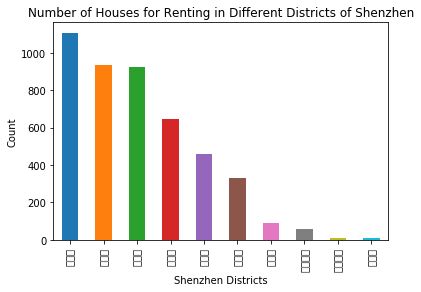

In [5]:
frame[1].value_counts().plot(kind='bar')
plt.title('Number of Houses for Renting in Different Districts of Shenzhen')
plt.xlabel('Shenzhen Districts')
plt.ylabel('Count')

In [40]:
house_layout = frame[4] == '2室1厅'
district = frame[1] == '南山区'
price_threshold = frame[6] < 6000
area_threshold = frame[5] > '60'
frame[house_layout & district & price_threshold & price_threshold & area_threshold]

,0,1,2,3,4,5,6
1723,20180826,南山区,大学城,学子荔园,2室1厅,71平米,5500
1793,20180826,南山区,后海,龙城花园,2室1厅,64平米,5500
1900,20180826,南山区,蛇口,山海津,2室1厅,72平米,5800
1946,20180826,南山区,蛇口,山海津,2室1厅,72平米,5800
3132,20180826,南山区,南头,光大村,2室1厅,70平米,5300
